In [9]:
! pip install psycopg2-binary pandas matplotlib seaborn

In [10]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
conn_params = {
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost',
    'port': 5432
}

In [12]:
def df_extract(query):
    conn = psycopg2.connect(**conn_params)
    df = pd.read_sql(query, conn)
    conn.close()

    return df

# Execução dos modelos

In [13]:
df = df_extract("""
SELECT 
    * 
FROM 
    public_elementary.dbt_run_results;                  
""")

/tmp/ipykernel_38362/2530785522.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


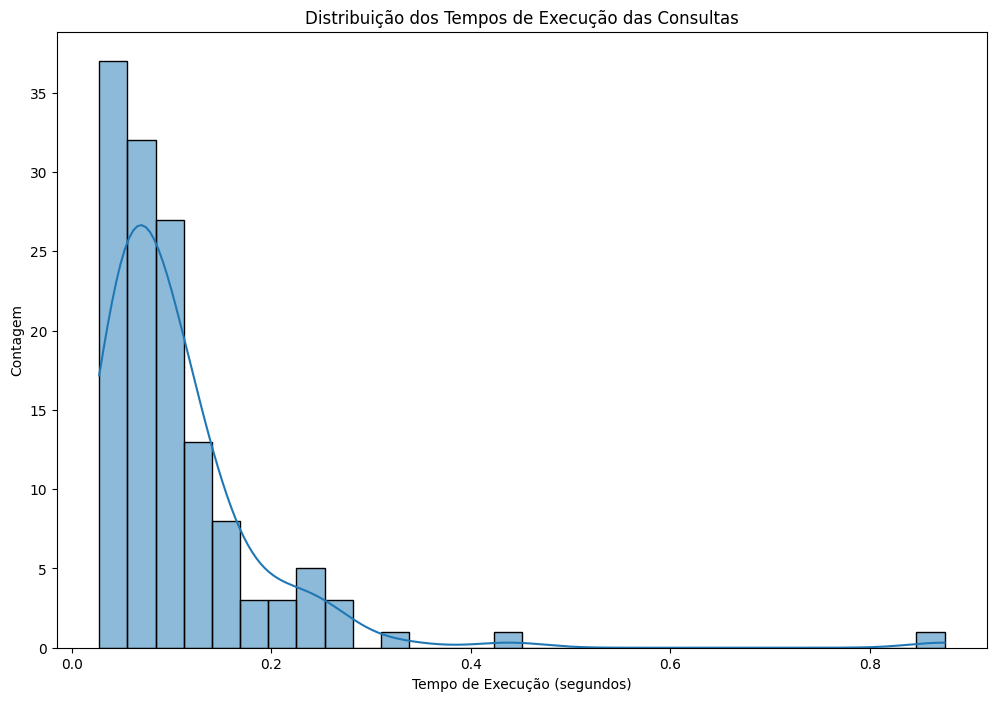

In [14]:
if not df.empty:
    df['execution_time'] = pd.to_numeric(df['execution_time'], errors='coerce')

    df = df.dropna(subset=['execution_time'])

    # Cria o gráfico
    plt.figure(figsize=(12, 8))
    sns.histplot(data=df, x='execution_time', bins=30, kde=True)
    plt.title('Distribuição dos Tempos de Execução das Consultas')
    plt.xlabel('Tempo de Execução (segundos)')
    plt.ylabel('Contagem')
    plt.show()
else:
    print("A tabela está vazia ou não contém dados relevantes.")

# Execução dos tests

In [15]:
dft = df_extract("""
SELECT 
    status,
    test_type,
    test_sub_type,
    failed_row_count,
    result_rows
FROM 
    public_elementary.elementary_test_results; 
""")

/tmp/ipykernel_38362/2530785522.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [17]:
dft

,status,test_type,test_sub_type,failed_row_count,result_rows
0,pass,dbt_test,generic,0.0,None
1,pass,dbt_test,generic,0.0,None
2,pass,dbt_test,generic,0.0,None
3,pass,dbt_test,generic,0.0,None
4,pass,dbt_test,generic,0.0,None
5,pass,dbt_test,generic,0.0,None
6,pass,dbt_test,generic,NaN,None
7,pass,dbt_test,generic,NaN,None
8,pass,dbt_test,generic,NaN,None
9,pass,dbt_test,singular,NaN,None


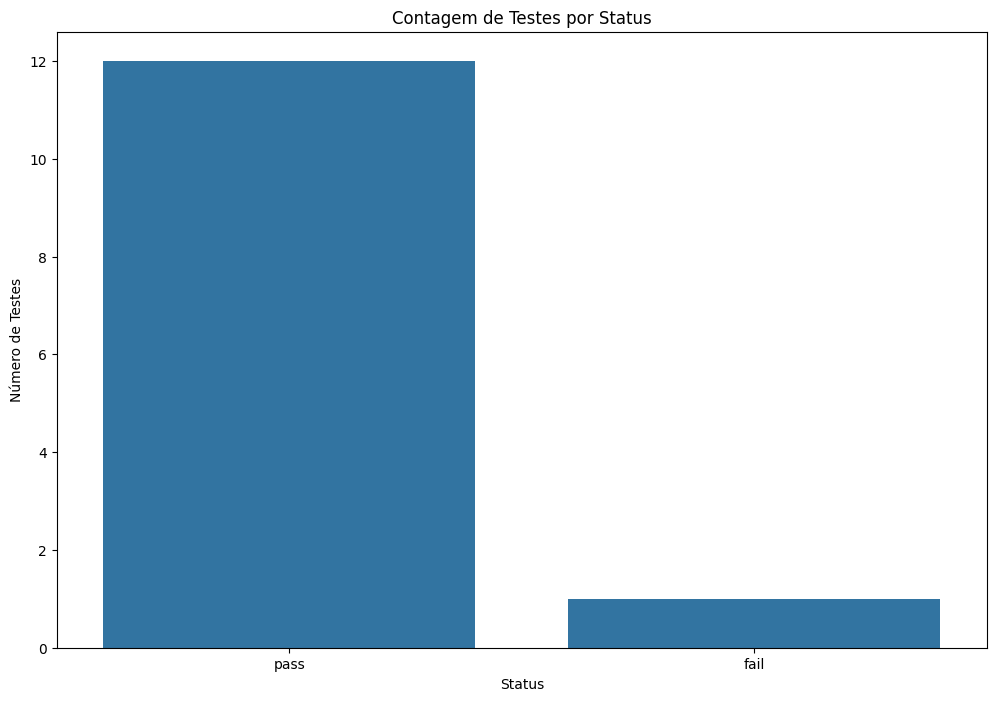

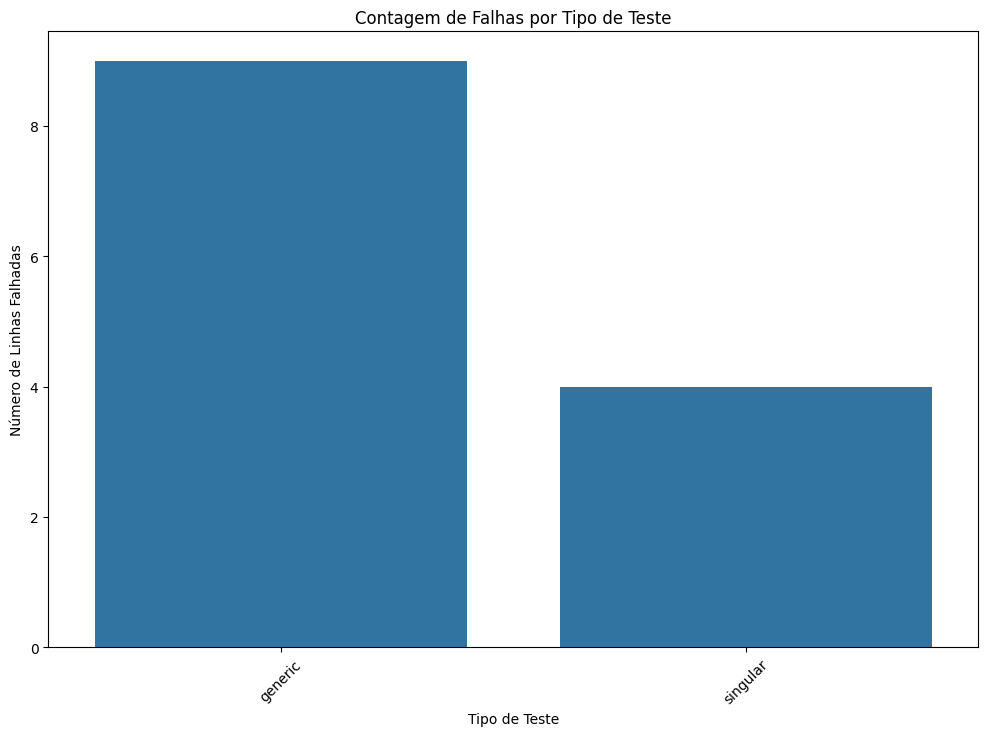

/tmp/ipykernel_38362/3361934696.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dft, x='test_type', y='failed_row_count', estimator='sum', palette='viridis')


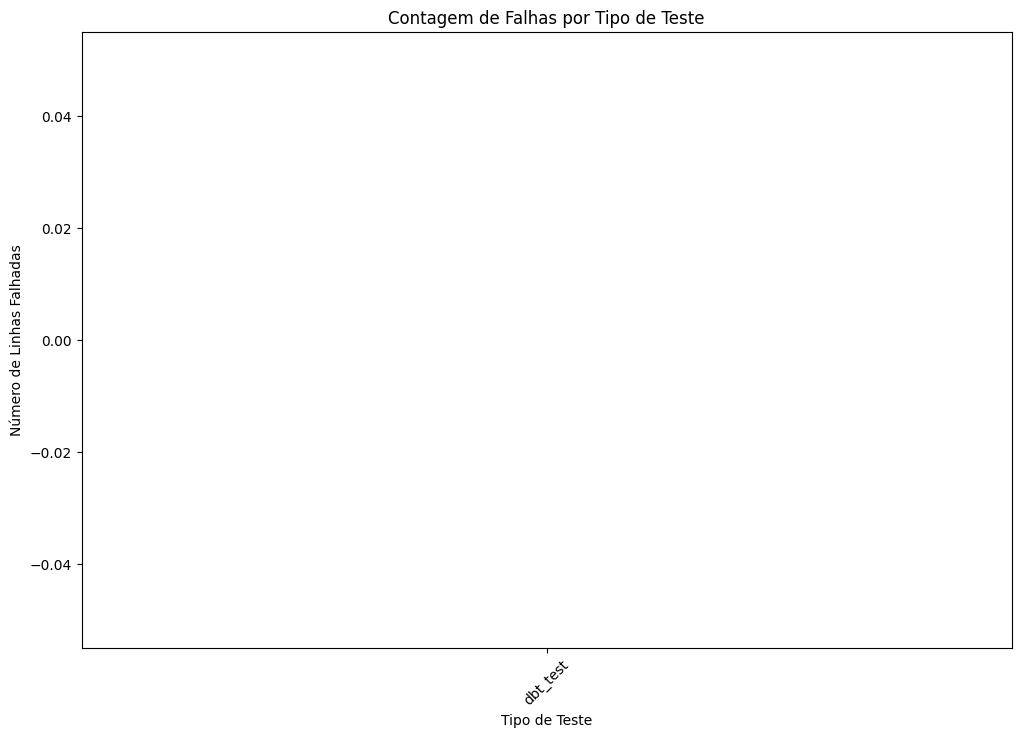

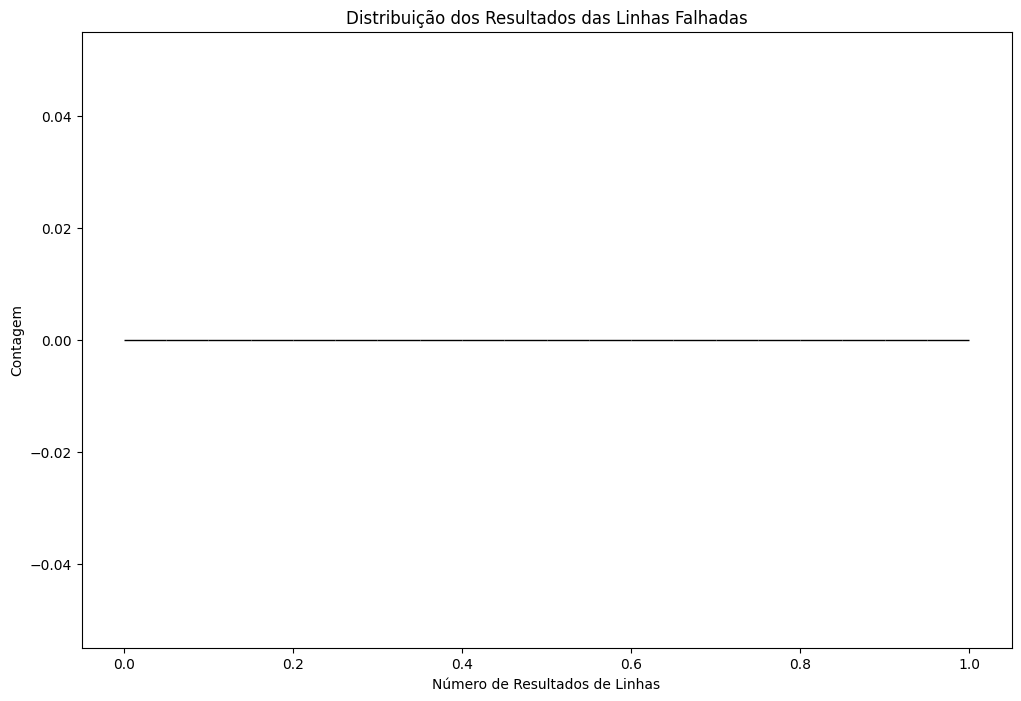

In [20]:
if not dft.empty:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=dft, x='status', order=dft['status'].value_counts().index)
    plt.title('Contagem de Testes por Status')
    plt.xlabel('Status')
    plt.ylabel('Número de Testes')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.countplot(data=dft, x='test_sub_type', order=dft['test_sub_type'].value_counts().index)
    plt.title('Contagem de Falhas por Tipo de Teste')
    plt.xlabel('Tipo de Teste')
    plt.ylabel('Número de Linhas Falhadas')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.barplot(data=dft, x='test_type', y='failed_row_count', estimator='sum', palette='viridis')
    plt.title('Contagem de Falhas por Tipo de Teste')
    plt.xlabel('Tipo de Teste')
    plt.ylabel('Número de Linhas Falhadas')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.histplot(data=dft, x='result_rows', bins=20, kde=True, color='red')
    plt.title('Distribuição dos Resultados das Linhas Falhadas')
    plt.xlabel('Número de Resultados de Linhas')
    plt.ylabel('Contagem')
    plt.show()
else:
    print("A tabela está vazia ou não contém dados relevantes.")